In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
import seaborn as sns      
sns.set()

warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('household_power_consumption.txt')

In [ ]:
data

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...
...,...
2075254,26/11/2010;20:58:00;0.946;0.000;240.430;4.000;...
2075255,26/11/2010;20:59:00;0.944;0.000;240.000;4.000;...
2075256,26/11/2010;21:00:00;0.938;0.000;239.820;3.800;...
2075257,26/11/2010;21:01:00;0.934;0.000;239.700;3.800;...


In [ ]:
dataset=pd.read_csv('household_power_consumption.txt',sep=';',parse_dates={'dt':['Date','Time']},infer_datetime_format=True,low_memory=False,na_values=['nan','?'],index_col='dt')

In [ ]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [ ]:
#2007년 1년만 나누기
data2007=dataset.loc["2007":"2007"]
data2007

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2007-12-31 23:55:00,1.746,0.204,242.41,7.2,0.0,0.0,18.0
2007-12-31 23:56:00,1.732,0.210,242.42,7.2,0.0,0.0,18.0
2007-12-31 23:57:00,1.732,0.210,242.50,7.2,0.0,0.0,18.0


In [ ]:
#Day 별로 나누기
daily_data=data2007.resample('D').sum()
daily_data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2007-01-01,2749.004,148.166,345785.73,11400.4,0.0,352.0,5880.0
2007-01-02,1269.236,190.342,348399.04,5348.2,0.0,348.0,6562.0
2007-01-03,1014.054,196.728,350722.21,4340.2,0.0,344.0,4765.0
2007-01-04,3259.412,202.302,345240.43,13648.6,1051.0,7597.0,10896.0
2007-01-05,2713.364,173.154,346313.90,11354.6,1483.0,379.0,7602.0
...,...,...,...,...,...,...,...
2007-12-27,2532.198,190.582,348640.72,10650.0,4122.0,1490.0,7960.0
2007-12-28,3113.052,206.800,348889.65,13004.0,1980.0,8554.0,15823.0
2007-12-29,3298.956,199.892,346392.96,13766.4,4836.0,2434.0,14906.0


Text(0.5, 1.0, 'Overall Energy Trend of Data')

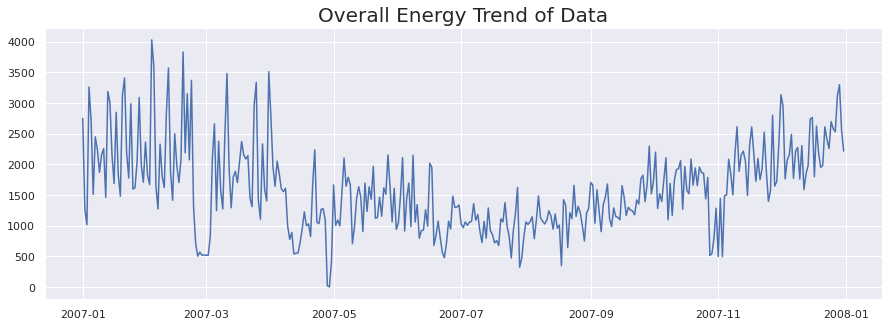

In [ ]:
#일별 에너지 사용량 그래프-> Global_active_power
plt.figure(figsize=(15,5))
plt.plot(daily_data.index, daily_data.Global_active_power)
plt.title("Overall Energy Trend of Data", fontdict= {'fontSize': 20})

Text(0.5, 1.0, 'Monthly Plot')

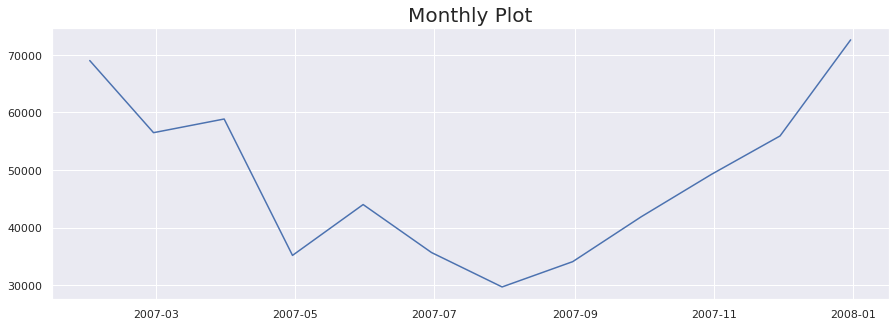

In [ ]:
#월별 에너지 사용량
monthly_data=data2007.resample('M').sum()

#월별 에너지 사용량
plt.figure(figsize=(15,5))
plt.plot(monthly_data.index,monthly_data.Global_active_power)
plt.title("Monthly Plot",fontdict={'fontSize':20})

In [ ]:
daily_data.to_csv('household_power_consumption_days.csv')
monthly_data.to_csv('hosehold_power_consumption_months.csv')

### **ARIMA MODEL**


**Argurement**


*   arima -- DataFrame(df,Global_active_power)
*   order -- (2,2,0) | arima (p,d,q)
*   split_ration -- dataset split ration | 0.51


In [ ]:
#트레이닝과 테스트를 위한 2달 간의 데이터
#2007년 3월부터 4월까지의 데이터만 이용할 것

data3to4=data2007.loc["2007-03":"2007-04"]
data3to4=data3to4.resample('D').sum()
arima=pd.DataFrame(data3to4['Global_active_power'])


In [ ]:
arima.head()

,Global_active_power
dt,
2007-03-01,517.564
2007-03-02,515.688
2007-03-03,819.122
2007-03-04,2090.700
2007-03-05,2660.332


In [ ]:
data3to4.shape

(61, 7)

In [ ]:
def arimaForecast(arima, order, split_ratio = 0.7, yhatFlag=True):
    warnings.filterwarnings("ignore")
    X = arima.values
    size =round(len(arima) * split_ratio)
    train, test = X[0:size], X[size:]
    history = [x for x in train]
    predictions = list()
    
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
    #     print(output)
        yhat = output[0]
        predictions.append(yhat)
        obs = yhat
        if yhatFlag:
            history.append(yhat)
        else:
            history.append(test[t])
#         print('predicted=%f, expected=%f' % (yhat, obs))
    
    error = mean_squared_error(test, predictions)
    
    return error, train, test, predictions, history

Gird Search Arima Parameters

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse, _,_,_,_ = arimaForecast(dataset, order, split_ratio=0.51)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
series = arima.values
p_values = [0,1,2,3,4,5,6,7]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")

In [ ]:
evaluate_models(arima, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=918820.275
ARIMA(0, 0, 1) MSE=922796.200
ARIMA(0, 0, 2) MSE=943770.125
ARIMA(0, 1, 0) MSE=16831221.029
ARIMA(0, 1, 1) MSE=2968540.780
ARIMA(0, 1, 2) MSE=3807960.094
ARIMA(0, 2, 0) MSE=3038295515.277
ARIMA(0, 2, 1) MSE=20652137.441
ARIMA(1, 0, 0) MSE=905016.911
ARIMA(1, 0, 1) MSE=917388.434
ARIMA(1, 1, 0) MSE=13780595.583
ARIMA(1, 1, 1) MSE=3369513.147
ARIMA(1, 2, 0) MSE=1804844367.893
ARIMA(1, 2, 1) MSE=12910609.215
ARIMA(2, 0, 0) MSE=945310.362
ARIMA(2, 0, 1) MSE=1029241.306
ARIMA(2, 0, 2) MSE=1013909.147
ARIMA(2, 1, 0) MSE=7731728.480
ARIMA(2, 1, 1) MSE=8430280.383
ARIMA(2, 1, 2) MSE=2932048.166
ARIMA(2, 2, 0) MSE=215701733.048
ARIMA(2, 2, 1) MSE=754661.545
ARIMA(2, 2, 2) MSE=941019.739
ARIMA(3, 0, 0) MSE=916691.150
ARIMA(3, 0, 1) MSE=1000175.855
ARIMA(3, 1, 0) MSE=8406897.636
ARIMA(3, 2, 0) MSE=159513313.782
ARIMA(3, 2, 1) MSE=1043082.197
ARIMA(4, 0, 0) MSE=995076.016
ARIMA(4, 0, 1) MSE=988713.277
ARIMA(4, 1, 0) MSE=5211546.639
ARIMA(4, 2, 0) MSE=155197811.060
ARI

# **Predictions with appending Yhat to Hitory**


Percent Error =(|Experimental Value - Theoretical Value | % Theoretical Value)*100

In [ ]:
_, train, test, predictions, history =arimaForecast(arima, order=(2,2,1),split_ratio=0.51, yhatFlag=True)

In [ ]:
error=mean_squared_error(test,predictions)
print('Test MSE : %.3f'%error)

Test MSE : 754606.877


Text(3, 8, 'TEST: 35181\n PREDICTION: 51705\n ERROR: [46.96624397]')

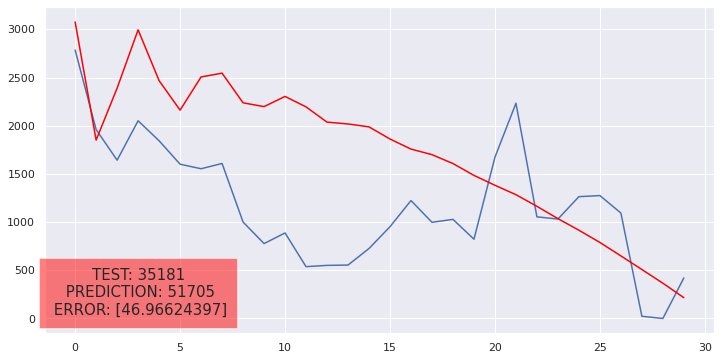

In [ ]:
#PLOT
plt.figure(figsize=(12,6))
plt.plot(test)
plt.plot(predictions,color='red')
perc=(abs(sum(predictions)-sum(test))/(sum(test)))*100
plt.text(3,8,"TEST: {}\n PREDICTION: {}\n ERROR: {}".format(round(sum(test)[0]),round(sum(predictions)[0]),perc),fontsize=15,bbox={'facecolor':'red','alpha':0.5,'pad':10}
         ,verticalalignment='bottom',horizontalalignment='center')



 **Predictions with appending Actual Value of Y to History**

In [ ]:
_,train,test,predictions,history=arimaForecast(arima, order=(2,2,1),split_ratio=0.51,yhatFlag=False)

In [ ]:
error=mean_squared_error(test,predictions)
print('Test MSE: %.3f'%error)


Test MSE: 192311.168


Text(3, 8, 'TEST:35181\n PREDICTION: 33753\n  ERROR: [4.05959994]')

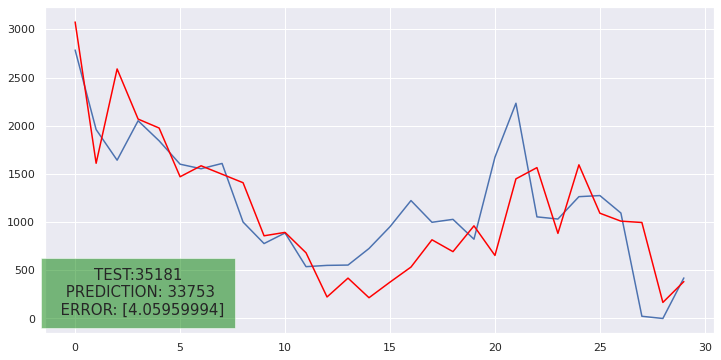

In [ ]:
#PLOT
plt.figure(figsize=(12,6))
plt.plot(test)
plt.plot(predictions,color='red')
perc=(abs(sum(predictions)-sum(test))/(sum(test)))*100
plt.text(3,8,"TEST:{}\n PREDICTION: {}\n  ERROR: {}".format(round(sum(test)[0]),round(sum(predictions)[0]),perc), 
         fontsize=15,bbox={'facecolor':'green','alpha':0.5,'pad':10},verticalalignment='bottom',horizontalalignment='center')

## **FB Prophet**

In [ ]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.style.use('fivethirtyeight')

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [ ]:
#data3tp4
prophet=pd.DataFrame(dfSeven['Global_active_power'])
prophet.index=pd.to_datetime(prophet.index)

In [ ]:
prophet.head()

,Global_active_power
dt,
2007-01-01,2749.004
2007-01-02,1269.236
2007-01-03,1014.054
2007-01-04,3259.412
2007-01-05,2713.364


In [ ]:
train=prophet.copy().loc["2007-01":"2007-03"]
test=prophet.copy().loc["2007-04":"2007-04"]

train.reset_index(inplace=True)
test.reset_index(inplace=True)

train.columns=['ds','y']
test.columns=['ds','y']

print("Train Shape: {}, Test shape: {}".format(train.shape,test.shape))

Train Shape: (90, 2), Test shape: (30, 2)


## Prophet Model

In [ ]:
model=Prophet(weekly_seasonality=False, yearly_seasonality=False, daily_seasonality=False).add_seasonality(name='weekly',
                                                                                                           period=7,
                                                                                                           fourier_order=15).add_seasonality(name='daily',
                                                                                                            period=1,
                                                                                                            fourier_order=20).add_seasonality(name='monthly',
                                                                                                            period=30.5,
                                                                                                            fourier_order=15)
model.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


## Forecasting

In [ ]:
testForecast = test.copy().drop('y', axis=1)
testForecast.head()

,ds
0,2007-04-01
1,2007-04-02
2,2007-04-03
3,2007-04-04
4,2007-04-05


In [ ]:
forecast=model.predict(testForecast)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
25,2007-04-26,881.464361,151.977381,1624.667655
26,2007-04-27,372.272748,-357.413068,1096.954156
27,2007-04-28,1740.802000,1080.892933,2454.741870
28,2007-04-29,1814.549209,1092.599305,2549.564135
29,2007-04-30,1658.986819,904.452066,2391.580121


## **PLOTTING**

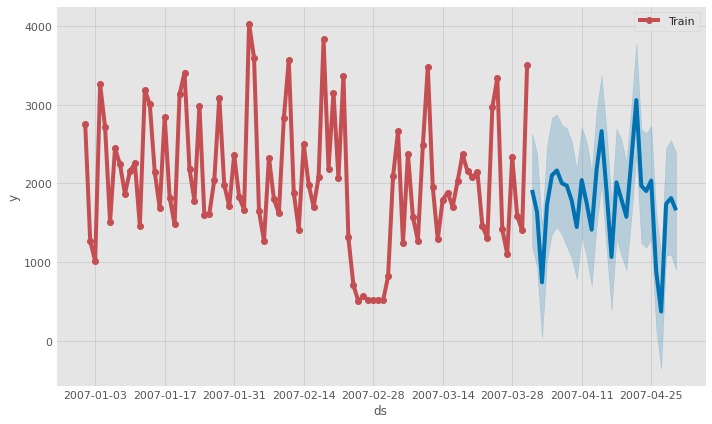

In [ ]:
a=model.plot(forecast)
plt.plot(train.ds,train.y,marker='o',label="Train",color='r')
plt.legend()

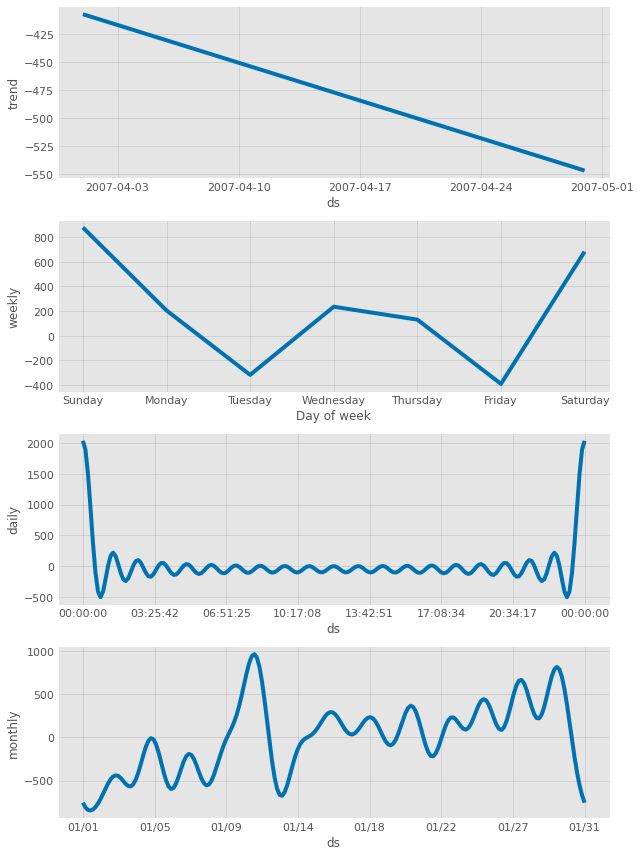

In [ ]:
a=model.plot_components(forecast)

In [ ]:
perc = (abs(sum(forecast['yhat']) -  sum(test['y'])) / sum(test['y'])) * 100
perc

52.45765443138387

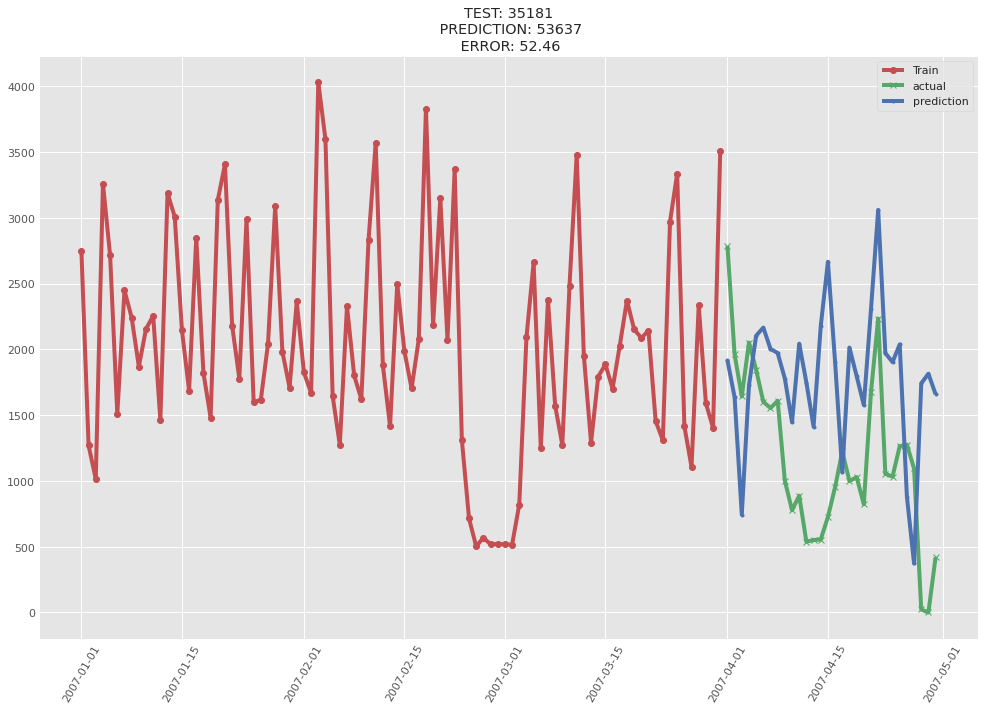

In [ ]:
plt.figure(figsize=(15,10))

plt.plot(train.ds,train.y,marker='o',label='Train',color='r')
plt.plot(test.ds,test.y,marker='x',label="actual",color='g')
plt.plot(forecast.ds,forecast.yhat,marker='.',color='b',label="prediction")
plt.xticks(rotation=60)
plt.title("TEST: {}\n PREDICTION: {}\n ERROR: {}".format(round(sum(test['y'])),round(sum(forecast['yhat'])),round(perc,2)))

plt.legend()


# **Auto Regression (AR) and Moving Average (MA)**

In [ ]:

def arForecast(ar, split_ratio = 0.7):
    warnings.filterwarnings("ignore")
    X = ar.values
    size =round(len(ar) * split_ratio)
    train, test = X[0:size], X[size:]
    
    model = AR(train)
    modelFit = model.fit()
    window = modelFit.k_ar
    coef = modelFit.params
    
    history = train[len(train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    
    for t in range(len(test)):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
#         print('predicted=%f, expected=%f' % (yhat, obs))
     
    
    return test, predictions

In [ ]:
dfMonth=dfSeven.loc["2007-03":"2007-04"]
dfMonth=dfMonth.resample('D').sum()
ar=pd.DataFrame(dfMonth['Global_active_power'])
ar.head()

,Global_active_power
dt,
2007-03-01,517.564
2007-03-02,515.688
2007-03-03,819.122
2007-03-04,2090.700
2007-03-05,2660.332


In [ ]:
test, predictions = arForecast(ar, split_ratio=0.51)

In [ ]:
error=mean_squared_error(test,predictions)
print('Test MSE: %.3f'%error)


Test MSE: 5515687.053


Text(3, 8, ' TEST: 35181\n PREDICTION: 91869\n Error: 161')

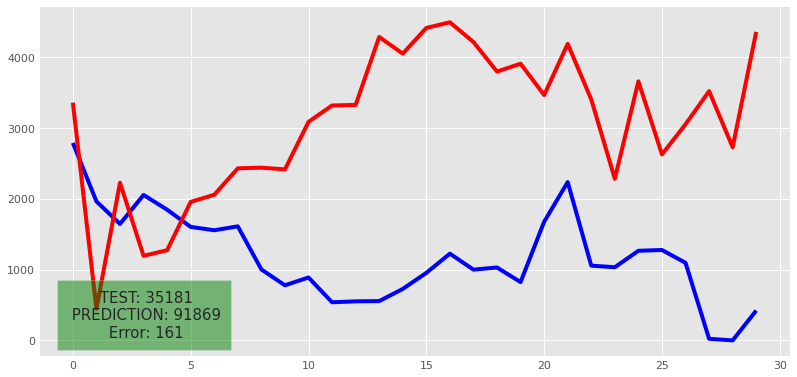

In [ ]:
#PLOT
plt.figure(figsize=(12,6))
plt.plot(test,color='blue')
plt.plot(predictions,color='red')
perc=(abs(sum(predictions)-sum(test))/(sum(test)))*100
plt.text(3, 8, " TEST: {}\n PREDICTION: {}\n Error: {}".format(round(sum(test)[0]), round(sum(predictions)[0]), round(perc[0])), 
         fontsize=15, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, verticalalignment='bottom', horizontalalignment='center')

## **Moving Average (MA)**

In [ ]:
movingAvg=(dfSeven['Global_active_power'])
movingAvg.head()

dt
2007-01-01    2749.004
2007-01-02    1269.236
2007-01-03    1014.054
2007-01-04    3259.412
2007-01-05    2713.364
Freq: D, Name: Global_active_power, dtype: float64

In [ ]:

def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, 
                      plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    
    plt.figure(figsize=(20,8))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(series[window:], "b", label="Actual values")
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        

    plt.legend(loc="upper left")
    plt.grid(True)

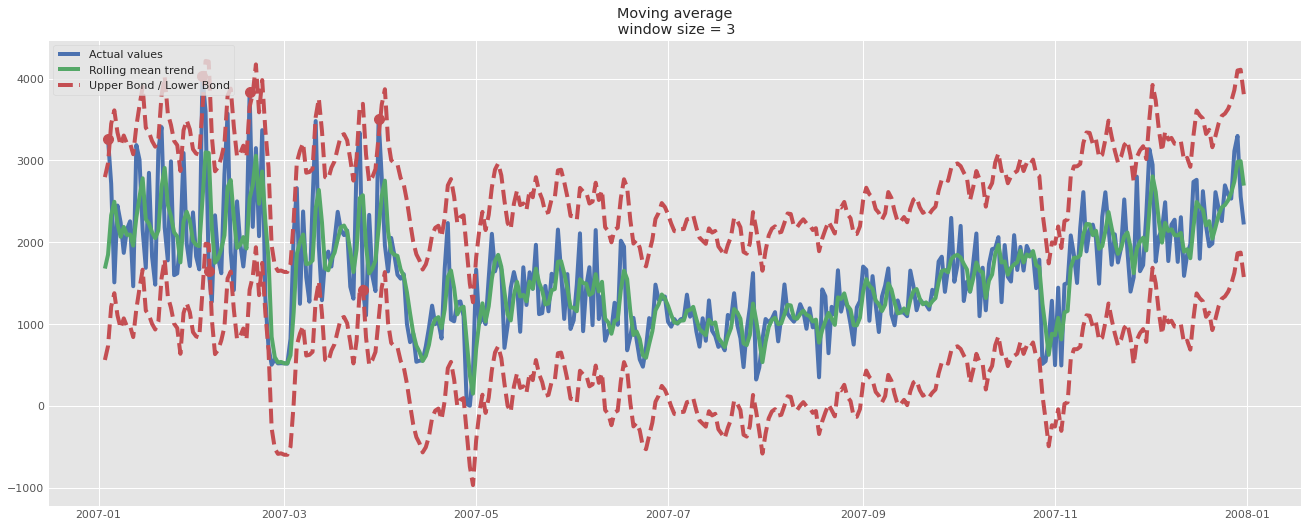

In [ ]:
plotMovingAverage(pd.DataFrame(movingAvg), 3, plot_intervals=True, plot_anomalies=True)

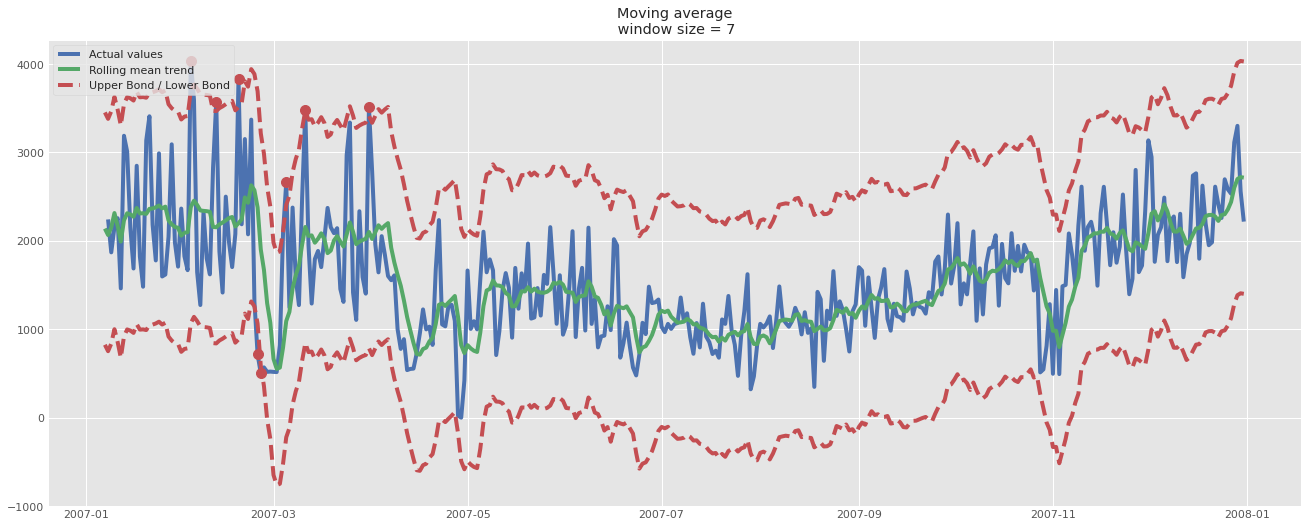

In [ ]:
plotMovingAverage(pd.DataFrame(movingAvg),7,plot_intervals=True,plot_anomalies=True)

In [ ]:
! git clone https://github.com/sejeong-park/Energy_Consumption.git

fatal: destination path 'Energy_Consumption' already exists and is not an empty directory.
